# 导入依赖

In [111]:
%matplotlib inline
from wxpy import *
import matplotlib.pyplot as plt
import re
import jieba
from wordcloud import WordCloud
from io import BytesIO
from PIL import Image

from matplotlib.font_manager import FontManager, FontProperties
cnFontPath = 'PingFang.ttc'
cnFont = FontProperties(fname=cnFontPath)

# 定义工具函数

In [83]:
def sendGroup(image, toGroup):
    groups = bot.groups().search(toGroup)
    if len(groups) > 0:
        groups[0].send_image(image)
    else:
        print('Not Found %s' % toGroup)
        

def sendFriend(image, toFriend):
    friends = bot.groups().search(toFriend)
    if len(friends) > 0:
        friends[0].send_image(image)
    else:
        print('Not Found %s' % toFriend)

# 二维码微信登录

In [87]:
haveShowQrCode = False
def qr_callback(uuid,status,qrcode):
    global haveShowQrCode
    if haveShowQrCode == False:
        data = BytesIO(qrcode)
        qr = Image.open(data)
        plt.axis('off')
        plt.imshow(qr)
        plt.title('qrcode %s' % qr.format)
        plt.show()
        haveShowQrCode = True

Getting uuid of QR code.


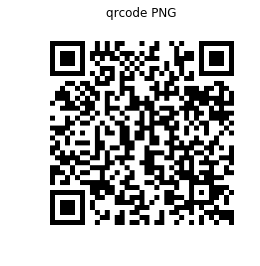

Please scan the QR code to log in.
Please press confirm on your phone.
LOG OUT!
Loading the contact, this may take a little while.
Login successfully as 烛龙一现


In [88]:
bot = Bot(console_qr= True, qr_path= None,qr_callback=qr_callback)

# 获取群聊并发送信息

In [89]:
# jiuxiaGroup = ensure_one(bot.groups().search('桃园酒侠'))

In [90]:
# jiuxiaGroup.send_msg('老王方了')

# 微信分析 - 朋友圈性别比例

In [127]:
def sexRatio():
    ratio = [0, 0, 0]
    for friend in bot.friends():
        ratio[friend.sex] += 1

    other, male, female = tuple(map(lambda r: r / float(len(bot.friends())), ratio))

    print(other, male, female)
    plot.figure(1, figsize=[6, 6])
    plot.title('The proportion of male and female friends')
    plot.pie([other, male, female],
             explode=[0, 0.1, 0],
             labels=['other', 'male', 'female'],
             autopct='%1.2f%%',
             pctdistance=0.8,
             shadow=True)
    sexDistImg = BytesIO()
    plot.savefig(sexDistImg)
    plot.show()
    plot.close('all')
    return sexDistImg

# 微信分析 - 好友地理分布

In [129]:
def provinceDist():
    dist = {}
    for friend in bot.friends():
        province = friend.province if friend.province.strip() else 'other'
        if province in dist:
            dist[province] += 1
        else:
            dist[province] = 1

    plot.figure(1, figsize=[10, 6])
    plot.title('\"%s\"的微信朋友地区分布统计' % bot.self.name, fontproperties=cnFont)
    plot.xlabel('城市', fontproperties=cnFont)
    plot.ylabel('分布人数', fontproperties=cnFont)

    x = range(0, len(dist.keys()))
    plot.bar(left=x,
             height=list(dist.values()),
             align='center',
             )

    plot.xticks(x, list(dist.keys()), fontproperties=cnFont, rotation=90)

    for (x, key) in enumerate(dist.keys()):
        plot.text(x - 0.25, dist[key] + 1.5, '%d' % dist[key], fontproperties=cnFont, rotation=90)
    provinceDistImg = BytesIO()
    plot.savefig(provinceDistImg)
    plot.show()
    plot.close('all')
    return provinceDistImg

# 微信分析 - 朋友圈词云

In [142]:
def signatureWordCloud():
    signatureText ="".join(list(map(lambda f: re.compile('<[^>]+>').sub("",f.signature), bot.friends())))
    space_split_words = " ".join(jieba.cut(signatureText, cut_all=True))
    gen_word_cloud = WordCloud(background_color='white', max_words = 2000, max_font_size=40, random_state=42, font_path=cnFontPath).generate(space_split_words)

    wordcloudImg = gen_word_cloud.to_image()
    plot.imshow(wordcloudImg)
    plot.show()
    return wordcloudImg

# 微信分析

In [145]:
def analyze():

    # 发送到群组
    # sendGroup(provinceDist(),'桃园酒侠')

    # 发给自己的文件小助手
#     bot.file_helper.send_image(sexRatio())
#     bot.file_helper.send_image(provinceDist())
#     bot.file_helper.send_image(signatureWordCloud())

    sexRatio()
    provinceDist()
    signatureWordCloud()

0.04878048780487805 0.6205962059620597 0.33062330623306235


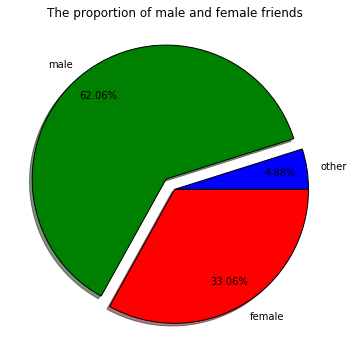

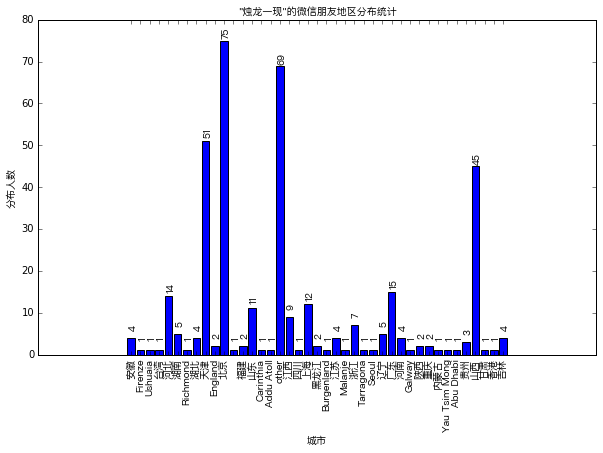

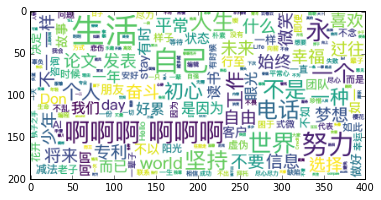

In [146]:
analyze()